In [1]:
# Render our plots inline
%matplotlib inline

# warnings: Provides a way to suppress or manage specific warning messages.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# pandas: Provides data structures and data analysis tools.
import pandas as pd

# numpy: Provides support for working with arrays and mathematical functions on arrays.
import numpy as np

# seaborn: Data visualization library based on matplotlib. 
import seaborn as sns

# matplotlib: A plotting library to produce visualizations.
import matplotlib.pyplot as plt

# StandardScaler: A utility from scikit-learn to standardize features.
from sklearn.preprocessing import StandardScaler

# train_test_split: Utility function from scikit-learn to split datasets.
# GridSearchCV: Utility function from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Various scikit-learn models
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# xgboost: An optimized gradient boosting library.
import xgboost as xgb
from xgboost import XGBClassifier

# confusion_matrix: A utility function from scikit-learn to create a confusion matrix.
# accuracy_score: A utility function from scikit-learn to calculate accuracy.
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

# category_encoders: Provides various encoding schemes to handle categorical variables.
import category_encoders as ce

# Enhance the appearance of plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = (108)

In [2]:
#Read in CSV
df = pd.read_csv('meteorites.csv')
df = df.iloc[:, 1:]
df

,id,name_type,class,mass,fall,year,lat,long,geolocation
0,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
45711,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [3]:
#Checking for any null values
df.isnull().sum()

id                0
name_type         0
class             0
mass            131
fall              0
year            291
lat            7315
long           7315
geolocation    7315
dtype: int64

In [4]:
print(df.dtypes)  # Check the data types of your columns

id               int64
name_type       object
class           object
mass           float64
fall            object
year           float64
lat            float64
long           float64
geolocation     object
dtype: object


In [5]:
#Since geolocation is a combination of the lat and long columns and it is an object, I do not need this column. So I'll drop it.
df = df.drop(columns=['geolocation'])

In [6]:
#Filling the null values with their mean value so as to avoid too much data loss
cap=["mass","lat","long",]
for i in cap:
    df.fillna(df[i].mean(),inplace=True)
df.isnull().sum()

id           0
name_type    0
class        0
mass         0
fall         0
year         0
lat          0
long         0
dtype: int64

In [7]:
has_duplicates = df.duplicated().any()
print(has_duplicates)  # This will print True if there are duplicates and False otherwise.

False


In [8]:
df['fall'] = df['fall'].map({'Fell': 1, 'Found': 0})
df['name_type'] = df['name_type'].map({'Valid': 1, 'Relict': 0})

In [9]:
#Using the seaborn Library to create visualizations for EDA
#sns.pairplot(df)

In [10]:
filtered_counts = df['class'][df['class'].str.startswith('Iron')].value_counts()

print(filtered_counts)

class
Iron, IIIAB          285
Iron, IIAB           118
Iron, ungrouped      113
Iron                  94
Iron, IAB-MG          84
Iron, IVA             69
Iron, IAB complex     54
Iron, IAB-ung         46
Iron, IAB-sLL         28
Iron, IID             19
Iron, IAB-sHL         17
Iron, IVB             14
Iron, IIE             14
Iron, IIIE            14
Iron, IC              10
Iron, IAB-sLM         10
Iron, IIIF             9
Iron, IAB-sLH          9
Iron, IIC              8
Iron, IIE-an           7
Iron, IIF              6
Iron, IVA-an           6
Iron, IIG              6
Iron, IAB-sHH          5
Iron, IAB?             4
Iron, IIIAB?           4
Iron, IIIAB-an         3
Iron, IAB-an           3
Iron?                  2
Iron, IC-an            2
Iron, IID-an           2
Iron, IAB-sHL-an       1
Iron, IIIE-an          1
Iron, IIAB-an          1
Iron, IIE?             1
Name: count, dtype: int64


In [11]:
# Strip white space of values in class column and assign it back to the dataframe
df['class'] = df['class'].str.strip()

# Set 1 for values that start with 'Iron' and 0 for the rest
df['class'] = df['class'].apply(lambda x: 1 if x.startswith('Iron') else 0)

# Visualize Normalization
print(df.groupby("class").size().sort_values())


class
1     1069
0    44647
dtype: int64


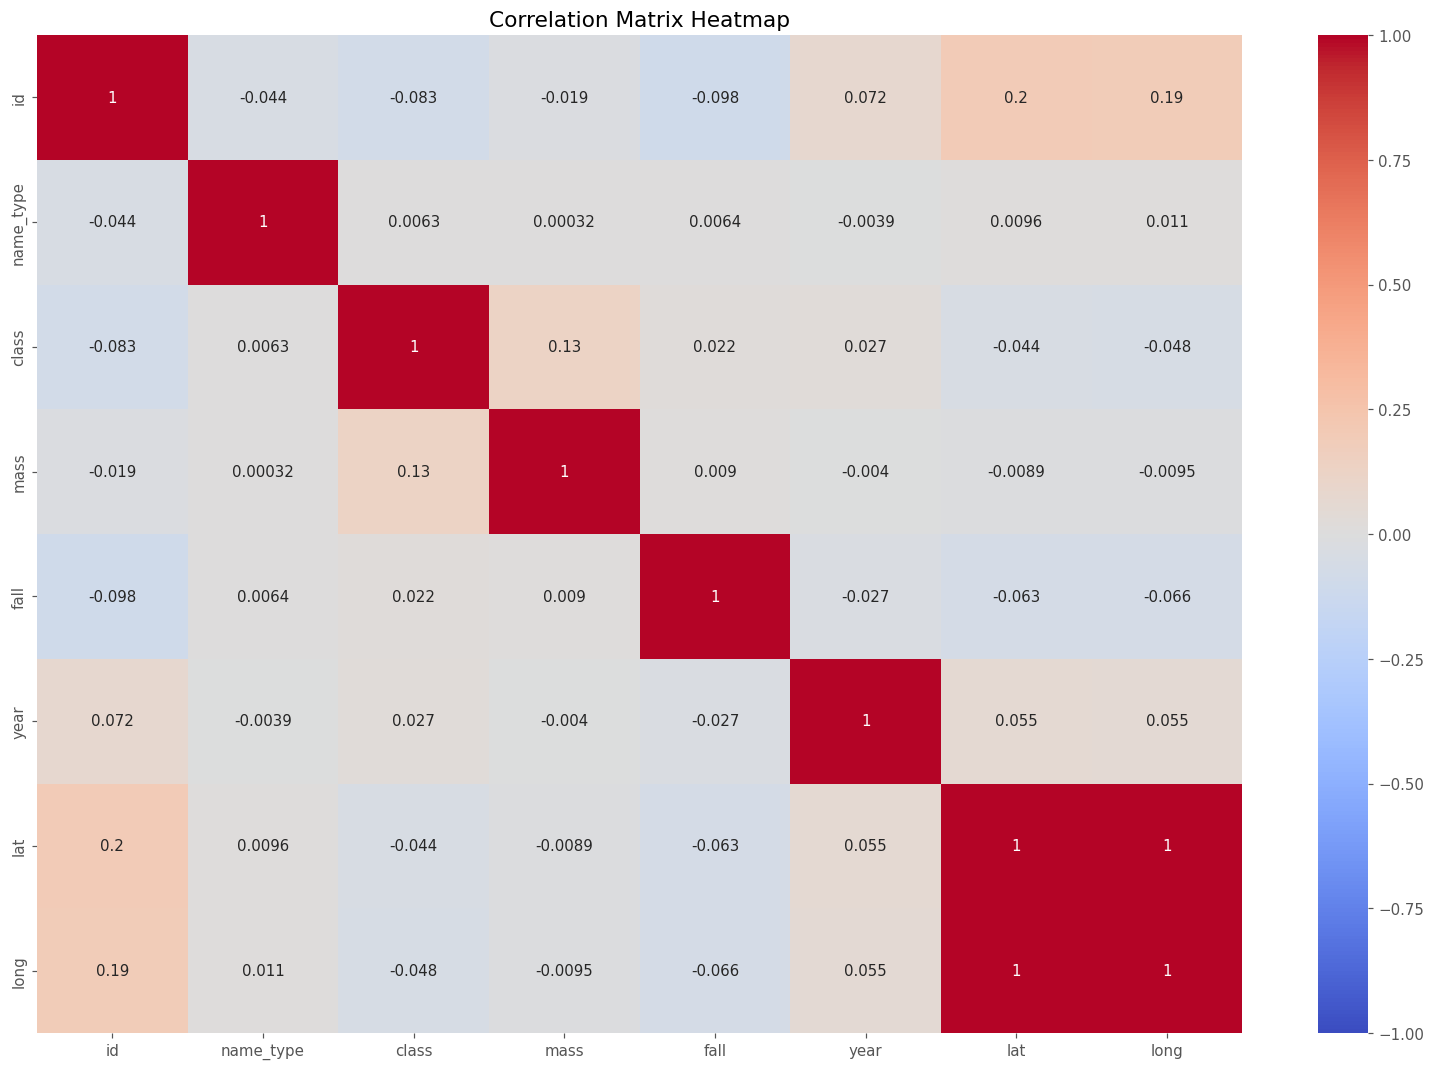

In [12]:
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# To avoid multicolinearity I will omit Lat since Lat and long highly correlate I will also be removing name_types later on as it is simply a value of valid versus relict which doesnt matter for this data set

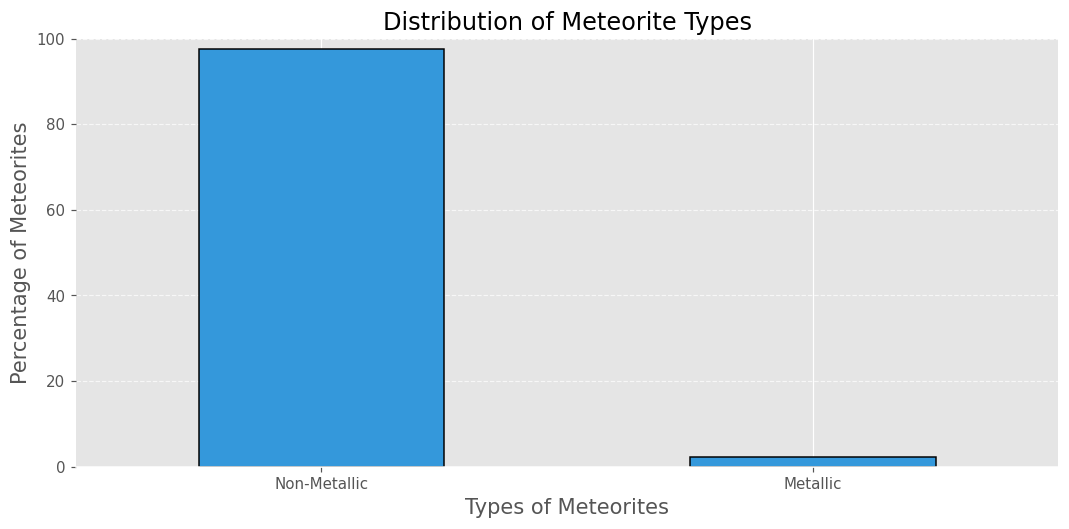

In [13]:
# Create Histogram/Divide the figure into a 1x2 grid
fig, ax1 = plt.subplots(figsize=(10, 5))


# Allows each bar to possess its own color
colors = ['#3498db', '#e74c3c']
for i, bar in enumerate(ax1.patches):
    bar.set_facecolor(colors[i])


    
s = df['class'].value_counts(normalize=True).mul(100)  # mul(100) is == *100

# Plot the data; Series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax1, ylim=[0,100], color=colors, edgecolor='black', linewidth=1)

# Removes the legend from view for aesthetic purposes
ax1.legend().set_visible(False)


# Set axes labels
ax1.set_ylabel('Percentage of Meteorites', fontsize=14)
ax1.set_xlabel('Types of Meteorites', fontsize=14)

# Set x-axis tick labels
labels = [item.get_text() for item in ax1.get_xticklabels()]
new_labels = ['Non-Metallic', 'Metallic']
ax1.set_xticklabels(new_labels, rotation = 0, fontsize=10)

# Set a title
ax1.set_title('Distribution of Meteorite Types', fontsize=16)

# Fine-tuning appearance
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# I will need to oversample the metallic types to get better data representation.

In [14]:
from sklearn.utils import resample

# Calculate desired count for the metallic class (80% of the non-metallic class count)
desired_samples = int(0.8 * len(df[df['class'] == 0]))

# Determine the number of samples needed for the metallic class to reach the desired count
samples_needed = desired_samples - len(df[df['class'] == 1])

# Use resample to generate the additional samples
minority_upsampled = resample(df[df['class'] == 1], 
                              replace=True, 
                              n_samples=samples_needed, 
                              random_state=42)

# Append the resampled minority samples to the original dataframe
df = pd.concat([df, minority_upsampled])

# Check the new distribution of the classes
print(df['class'].value_counts())

class
0    44647
1    35717
Name: count, dtype: int64


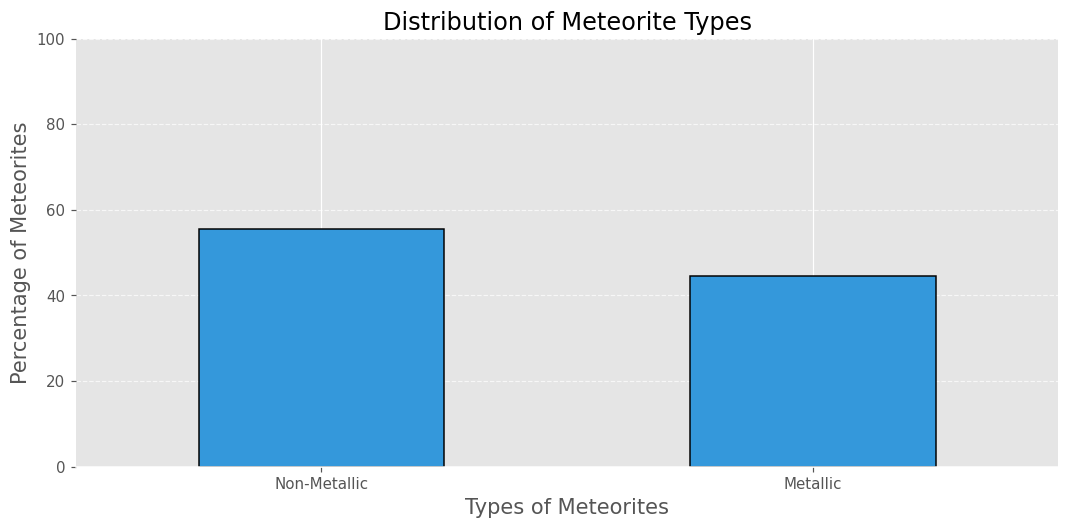

In [15]:
# Create Histogram/Divide the figure into a 1x2 grid
fig, ax1 = plt.subplots(figsize=(10, 5))


# Allows each bar to possess its own color
colors = ['#3498db', '#e74c3c']
for i, bar in enumerate(ax1.patches):
    bar.set_facecolor(colors[i])


    
s = df['class'].value_counts(normalize=True).mul(100)  # mul(100) is == *100

# Plot the data; Series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax1, ylim=[0,100], color=colors, edgecolor='black', linewidth=1)

# Removes the legend from view for aesthetic purposes
ax1.legend().set_visible(False)


# Set axes labels
ax1.set_ylabel('Percentage of Meteorites', fontsize=14)
ax1.set_xlabel('Types of Meteorites', fontsize=14)

# Set x-axis tick labels
labels = [item.get_text() for item in ax1.get_xticklabels()]
new_labels = ['Non-Metallic', 'Metallic']
ax1.set_xticklabels(new_labels, rotation = 0, fontsize=10)

# Set a title
ax1.set_title('Distribution of Meteorite Types', fontsize=16)

# Fine-tuning appearance
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
# Select columns of interest 
df = df[['class', 'mass', 'fall','year', 'long']]

print(df.head())
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

   class      mass  fall    year       long
0      0      21.0     1  1880.0    6.08333
1      0     720.0     1  1951.0   10.23333
2      0  107000.0     1  1952.0 -113.00000
3      0    1914.0     1  1976.0  -99.90000
4      0     780.0     1  1902.0  -64.95000
(80364, 5)


In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
# Now, split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.35, random_state = 42)

In [19]:
#covariance testing initialize
my_cv = KFold(n_splits=10,shuffle=True,random_state=178)

In [20]:
#Baseline accuracy
baseline_accuracy = y_test.value_counts(normalize=True).max()
print("Baseline Accuracy:", '{0:.2f}'.format(baseline_accuracy * 100), "%")

Baseline Accuracy: 55.67 %


In [21]:
# Now, the training and testing data should have the same columns
print(X_train.columns)
print(X_test.columns)

Index(['mass', 'fall', 'year', 'long'], dtype='object')
Index(['mass', 'fall', 'year', 'long'], dtype='object')


In [22]:
#XGBoost Model before Hyper parameter tuning
#We'll fix the random state so that when you run this it is the same as when I run it.
model = XGBClassifier(random_state=42)

accuracies = cross_val_score(model, X=X_train, y=y_train, cv=my_cv)

print(f'Average accuracy of folds: {np.mean(accuracies)} \n')
print(f'Standard deviation of accuracy of folds: {np.std(accuracies)} \n')

# Training the model on the entire training set
model.fit(X=X_train, y=y_train)

# Predictions on test set
predictions = model.predict(X_test)

# Calculate the accuracy
test_acc = accuracy_score(y_test, predictions)

print(f'Accuracy on test set: {test_acc}')

Average accuracy of folds: 0.9721456610955371 

Standard deviation of accuracy of folds: 0.0027209495592524268 

Accuracy on test set: 0.9742249715585893


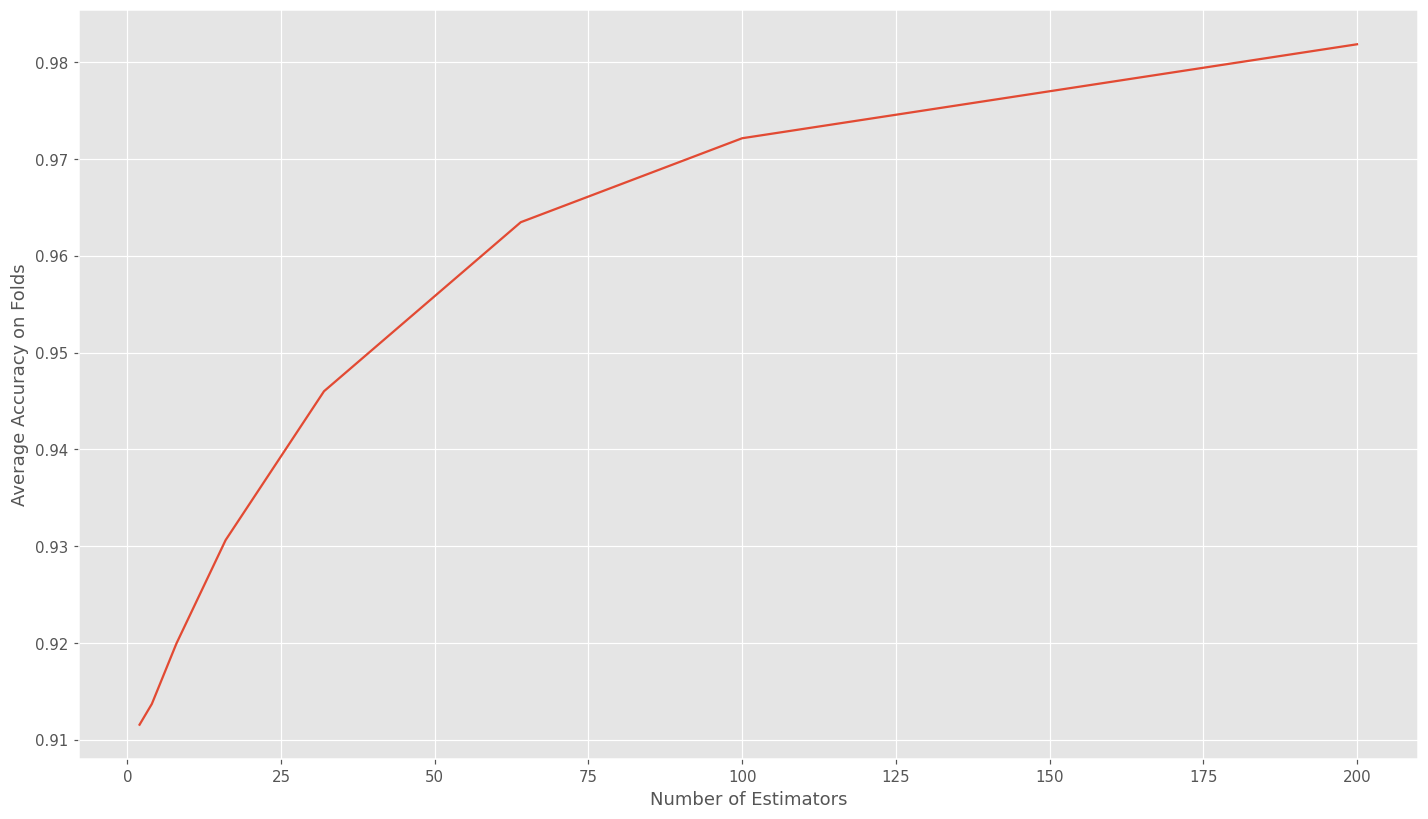

In [23]:
#Checking the number of estimators to see 
n_estimators = [2,4,8,16,32,64,100,200]
estimator_acc = []

#Looping through the number of estimators and finding the best
for estimator in n_estimators:
  model = XGBClassifier(random_state=42,n_estimators=estimator)

  accuracies = cross_val_score(model, X=X_train, y=y_train, cv=my_cv)


  estimator_acc.append(np.mean(accuracies))

plt.figure(figsize=(16,9))
plt.plot(n_estimators,estimator_acc)
plt.xlabel('Number of Estimators')
plt.ylabel('Average Accuracy on Folds')
plt.show()

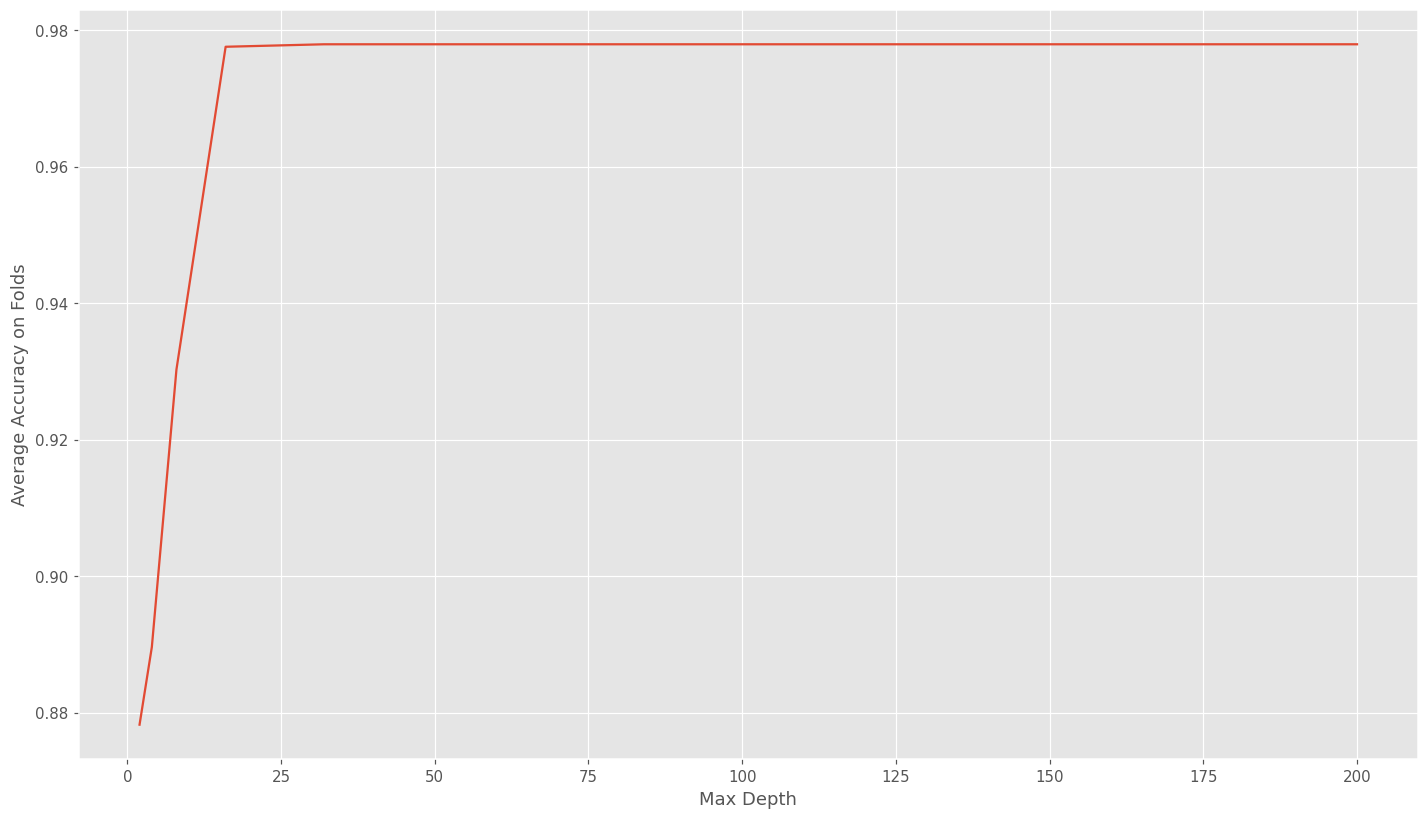

In [24]:
#Checking best max depth value
max_depths = [2,4,8,16,32,64,100,200]
depth_acc = []
#Looping through the number of estimators and finding the best
for depth in max_depths:
  model = XGBClassifier(random_state=42,n_estimators=2,max_depth = depth)

  accuracies = cross_val_score(model, X=X_train, y=y_train, cv=my_cv)

  depth_acc.append(np.mean(accuracies))

plt.figure(figsize=(16,9))
plt.plot(max_depths,depth_acc)
plt.xlabel('Max Depth')
plt.ylabel('Average Accuracy on Folds')
plt.show()

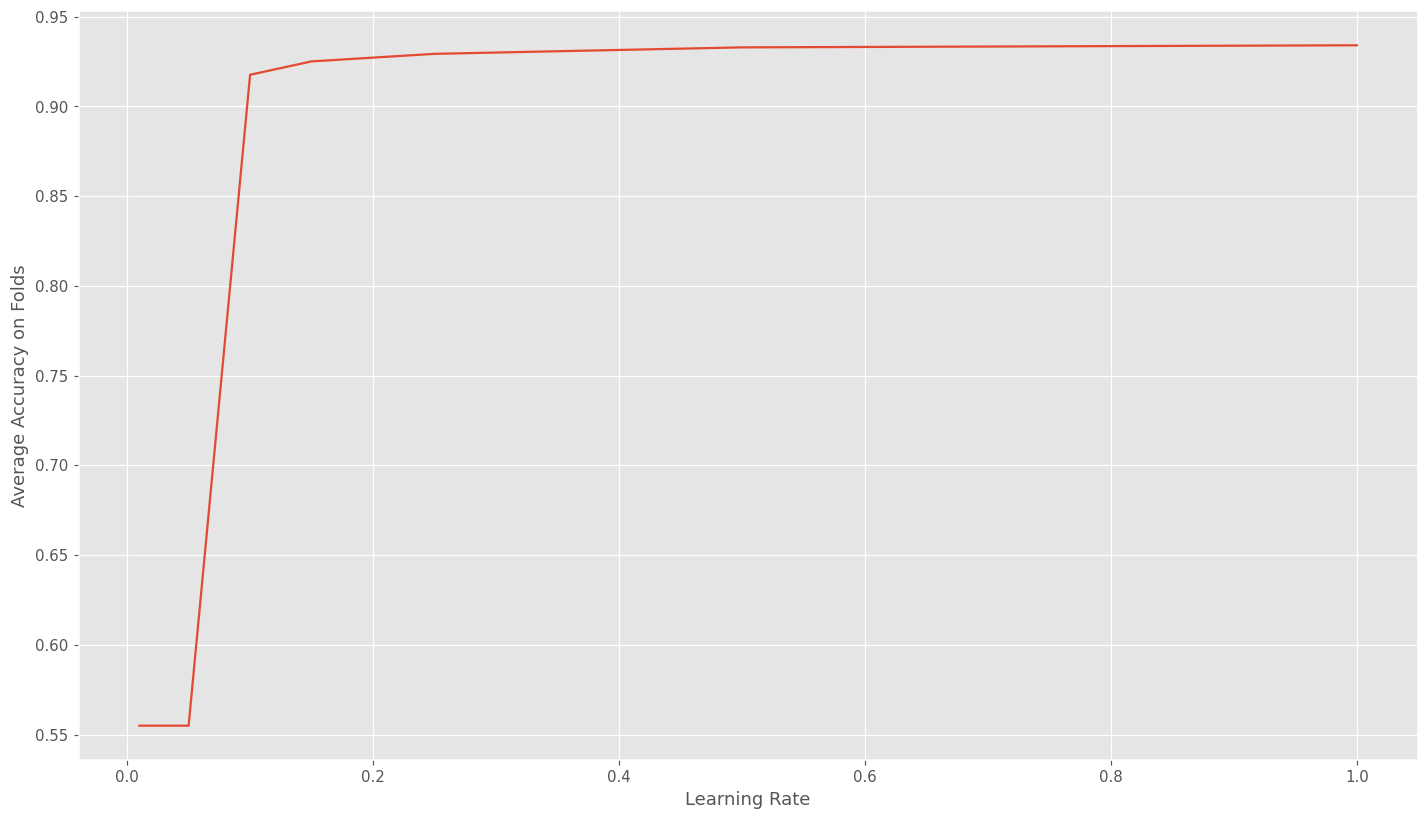

In [25]:
#checking best learning rate
learning_rates = [.01,.02,.05,.1,.15,.25,.5,1]
rate_acc = []
#Looping through the number of estimators and finding the best
for rate in learning_rates:
  model = XGBClassifier(random_state=42, n_estimators = 2, learning_rate=rate,
                        max_depth=8)

  accuracies = cross_val_score(model, X=X_train, y=y_train, cv=my_cv)

  rate_acc.append(np.mean(accuracies))

plt.figure(figsize=(16,9))
plt.plot(learning_rates, rate_acc)
plt.xlabel('Learning Rate')
plt.ylabel('Average Accuracy on Folds')
plt.show()

In [26]:
#Inputting all that we learned into a final model
model = XGBClassifier(random_state=42, n_estimators=200, max_depth=75, learning_rate=1.0)

# Cross-validation scores
accuracies = cross_val_score(model, X=X_train, y=y_train, cv=my_cv)

print(f'Average accuracy of folds: {np.mean(accuracies)} \n')
print(f'Standard deviation of accuracy of folds: {np.std(accuracies)} \n')

# Performance on the training set, for comparison with our parameter-tuned model later
model.fit(X_train, y_train)

# Predictions on test set
predictions = model.predict(X_test)

# Accuracy calculation
test_acc = accuracy_score(y_test, predictions)

print(f'Accuracy on test set: {test_acc}')

Average accuracy of folds: 0.9874415868497772 

Standard deviation of accuracy of folds: 0.0011747792742753372 

Accuracy on test set: 0.987023606370876


In [27]:
# Creating a confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True Class')
        plt.xlabel('Predicted Class' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

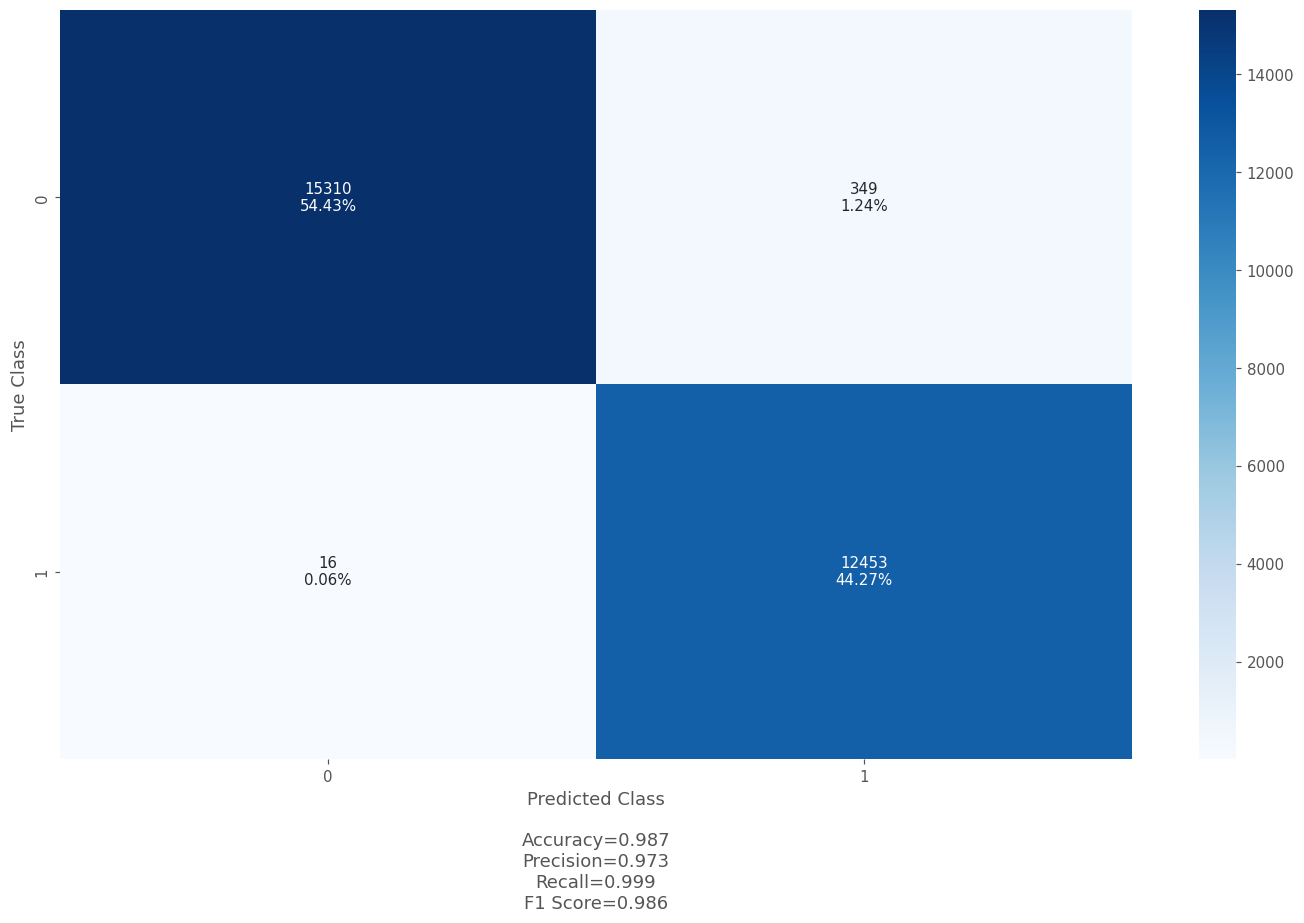

In [28]:
# Creates and displays a confusion matrix for the given predictions using a custom function `make_confusion_matrix`
make_confusion_matrix(confusion_matrix(y_test, predictions), figsize=(16,9))

Confusion Matrix Components:

    True Positive (TP): 12453 instances where the model predicted that a class is metallic (1) and it actually is.
    True Negative (TN): 15310 instances where the model predicted that a class isn't metallic (0) and it actually isn't.
    False Positive (FP): 349 instances where the model predicted that a class is metallic (1) and it actually isn't.
    False Negative (FN): 16 instances where the model predicted that a class isn't metallic (0) but it actually is

Metrics:

    Accuracy: 98.7% of the total predictions made by the model are correct.
    Precision: Out of all instances predicted as "metallic", 97.3% are correct.
    Recall: Recall, also known as sensitivity or true positive rate, indicates that out of all actual metallic instances, the model correctly identified 99.9% of them as metallic.
    F1 Score: A harmonic mean of Precision and Recall which is 98.6%. It helps balance Precision and Recall in situations where one might be more relevant than the other.

Conclusions:

    While the model has a very high precision and recall, there are still a few misclassifications. Specifically, 349 false positives and 16 false negatives. This suggests that while the model is robust, there is still some room for improvement, especially in terms of reducing false positives.
    The high F1 score of 0.986 suggests that the model has a balanced performance in terms of both precision and recall.
    The model has a high precision (97.3%) and an even higher recall (99.9%). This means that the model is great at avoiding false negatives (instances where it should have identified as metallic but didn't) given the high recall, and also very good at making correct positive identifications given its high precision.
    The model is highly accurate beating the baseline by a fair amount.

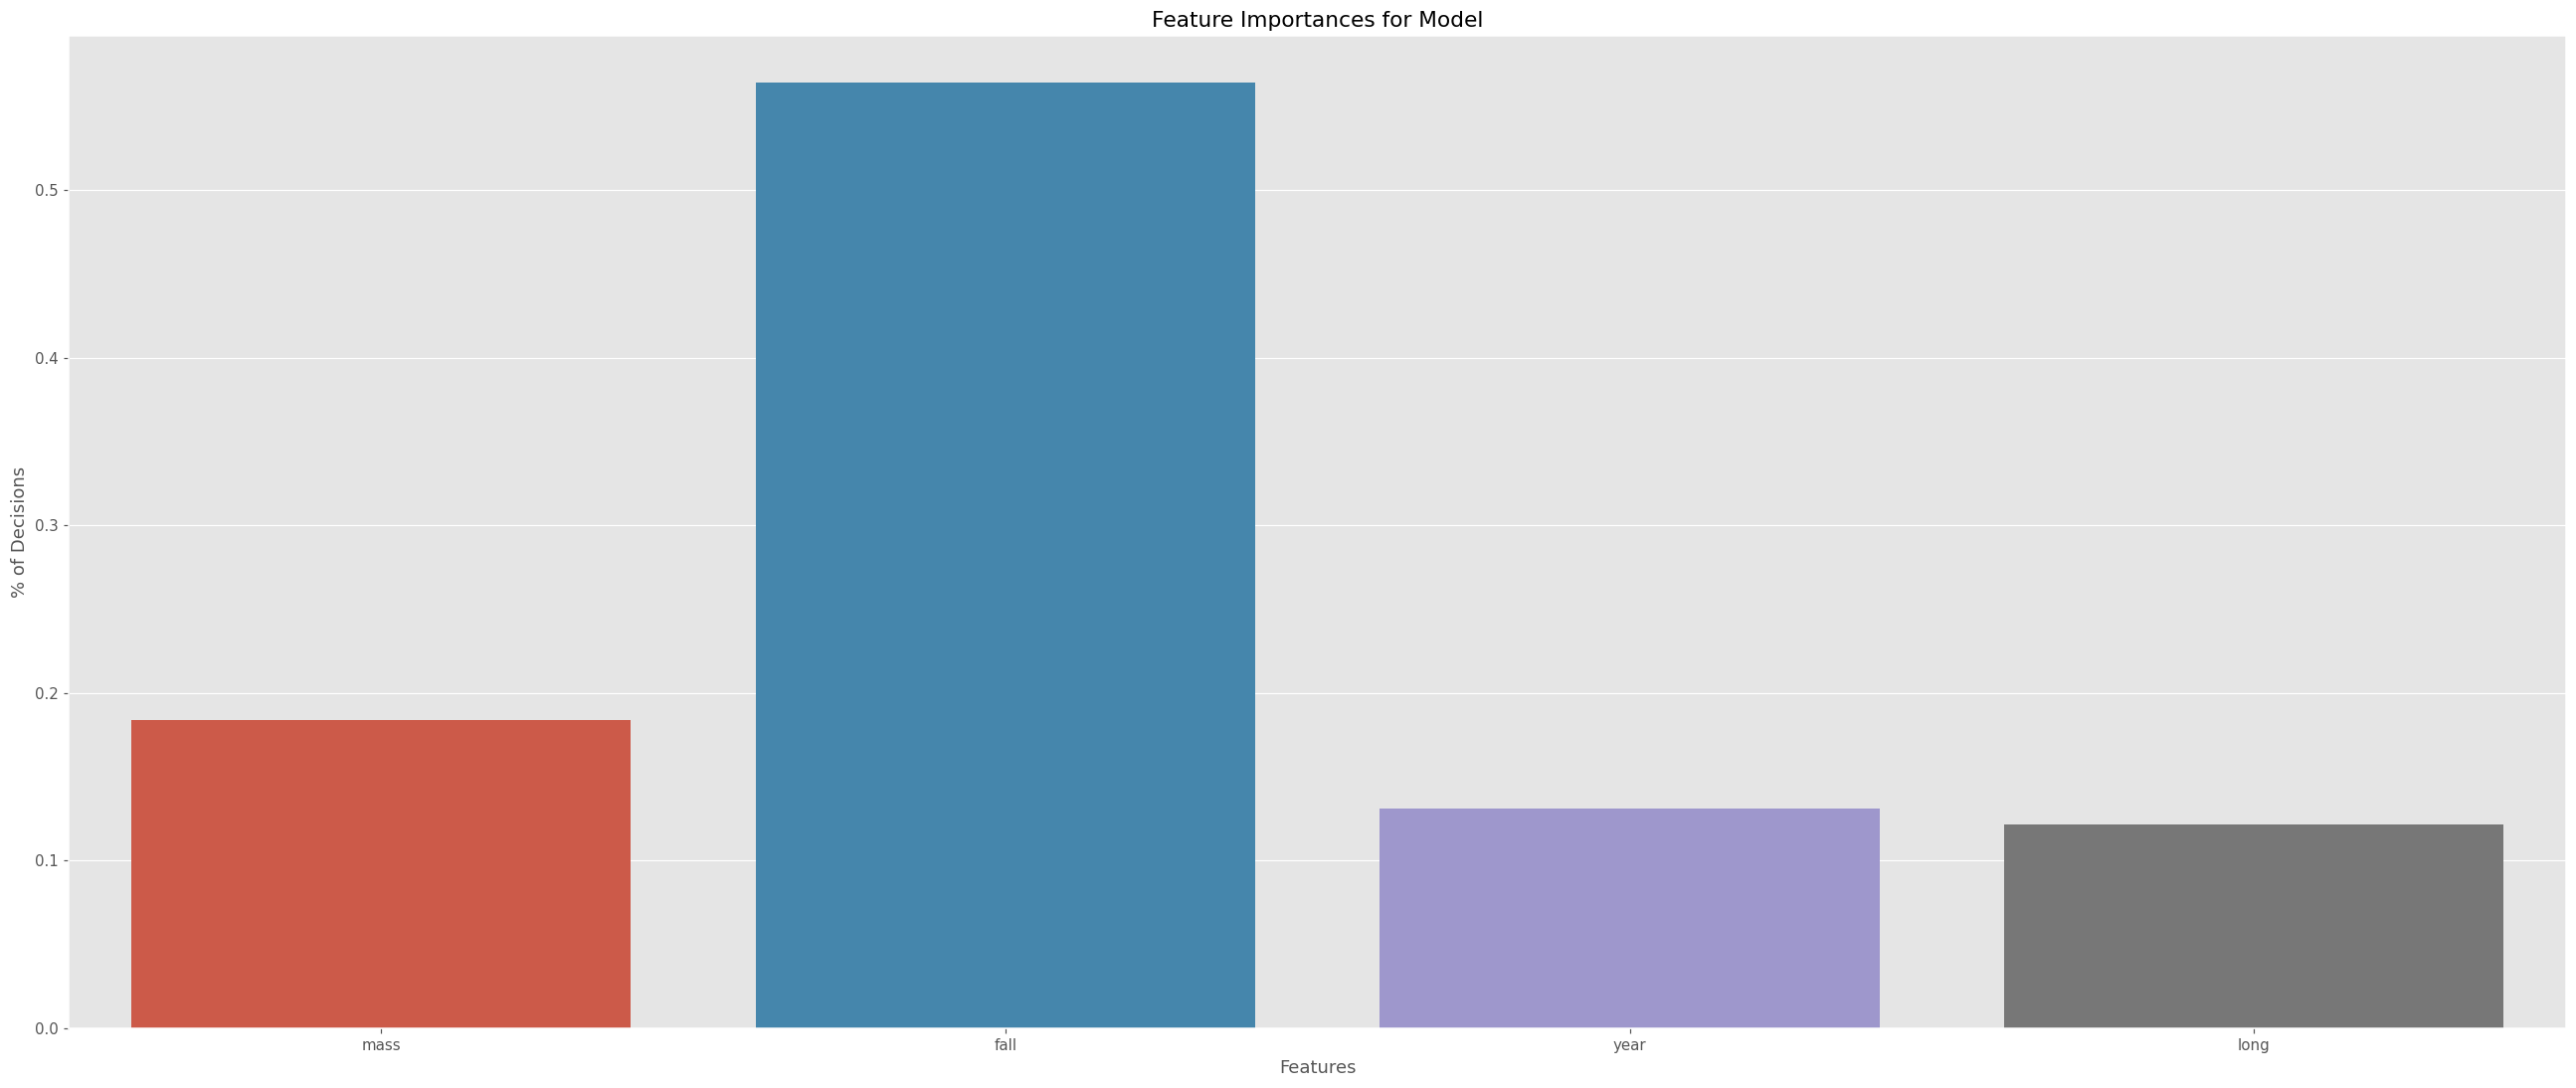

In [29]:
# Plotting Features of importance
feature_importances = model.feature_importances_
plt.figure(figsize=(30,12))
sns.barplot(x=X_train.columns, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('% of Decisions')
plt.title('Feature Importances for Model')
plt.show()

In [30]:
#Intialize our other models
cart01 = DecisionTreeClassifier(max_leaf_nodes=5).fit(X_train,y_train) # using default criterion 'gini' 
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(X_train,y_train)
rf01 = RandomForestClassifier(n_estimators = 50,criterion="gini").fit(X_train,y_train)
prediction_cart01 = cart01.predict(X_train)
prediction_c50_01 = c50_01.predict(X_train)
prediction_rf01 = rf01.predict(X_train)

In [31]:
# create a function that we can use to check how our predictions compare to the actual values
def eval_prediction(pred, actual):
    index = 0
    correct = 0
    for outcome in actual:
        if pred[index] == outcome:
            correct += 1
        index+=1
    return correct

In [32]:
#Using the evaluation function to see how many we got correct for each model on the training set
print("CART:", eval_prediction(prediction_cart01, y_train))
print("C5.0:", eval_prediction(prediction_c50_01, y_train))
print("Random Forest:", eval_prediction(prediction_rf01, y_train))

CART: 46288
C5.0: 45821
Random Forest: 52223


In [33]:
print("CART:", '{0:.2f}'.format((eval_prediction(prediction_cart01, y_train)/len(X_train))*100),"%")
print("C5.0:", '{0:.2f}'.format((eval_prediction(prediction_c50_01, y_train)/len(X_train))*100),"%")
print("Random Forest:", '{0:.2f}'.format((eval_prediction(prediction_rf01, y_train)/len(X_train))*100),"%")

CART: 88.61 %
C5.0: 87.72 %
Random Forest: 99.98 %


In [34]:
print(cart01.score(X_train,y_train))
print(c50_01.score(X_train,y_train))
print(rf01.score(X_train,y_train))

0.8861321693850984
0.8771919748832223
0.9997511294892412


In [35]:
# Make predictions
prediction_cart_test = cart01.predict(X_test)
prediction_c50_test = c50_01.predict(X_test)
prediction_rf_test = rf01.predict(X_test)

# Evaluate the predictions
print("Performance on Test Set:")
print("CART:", '{0:.2f}'.format((eval_prediction(prediction_cart_test, y_test)/len(X_test))*100),"%")
print("C5.0:", '{0:.2f}'.format((eval_prediction(prediction_c50_test, y_test)/len(X_test))*100),"%")
print("Random Forest:", '{0:.2f}'.format((eval_prediction(prediction_rf_test, y_test)/len(X_test))*100),"%")

Performance on Test Set:
CART: 88.50 %
C5.0: 87.75 %
Random Forest: 99.19 %
